In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/437_dataset/Crop_recommendation.csv"
df = pd.read_csv(path)

In [ ]:
import warnings 
from sklearn.exceptions import DataConversionWarning 
warnings.filterwarnings('ignore')

# Pre Proccessing

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
df.size

17600

In [ ]:
df.shape

(2200, 8)

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
unique = {}
for col in df.columns:
    unique[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique, index=['unique value count']).transpose()

,unique value count
N,137
P,117
K,73
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


In [ ]:
df.duplicated().sum()

0

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,N,P,K,temperature,humidity,ph,rainfall,label


In [ ]:
temp_df2 = pd.DataFrame({'label': df.label.unique(), 'label_enc':range(len(df.label.unique()))})# create a temporary dataframe 
data = df.merge(temp_df2, on='label', how='left')# merging it by assigning different values to different strings.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   label_enc    2200 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 171.9+ KB


# Visualization

In [ ]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f9e2f0730>,
      dtype=object)

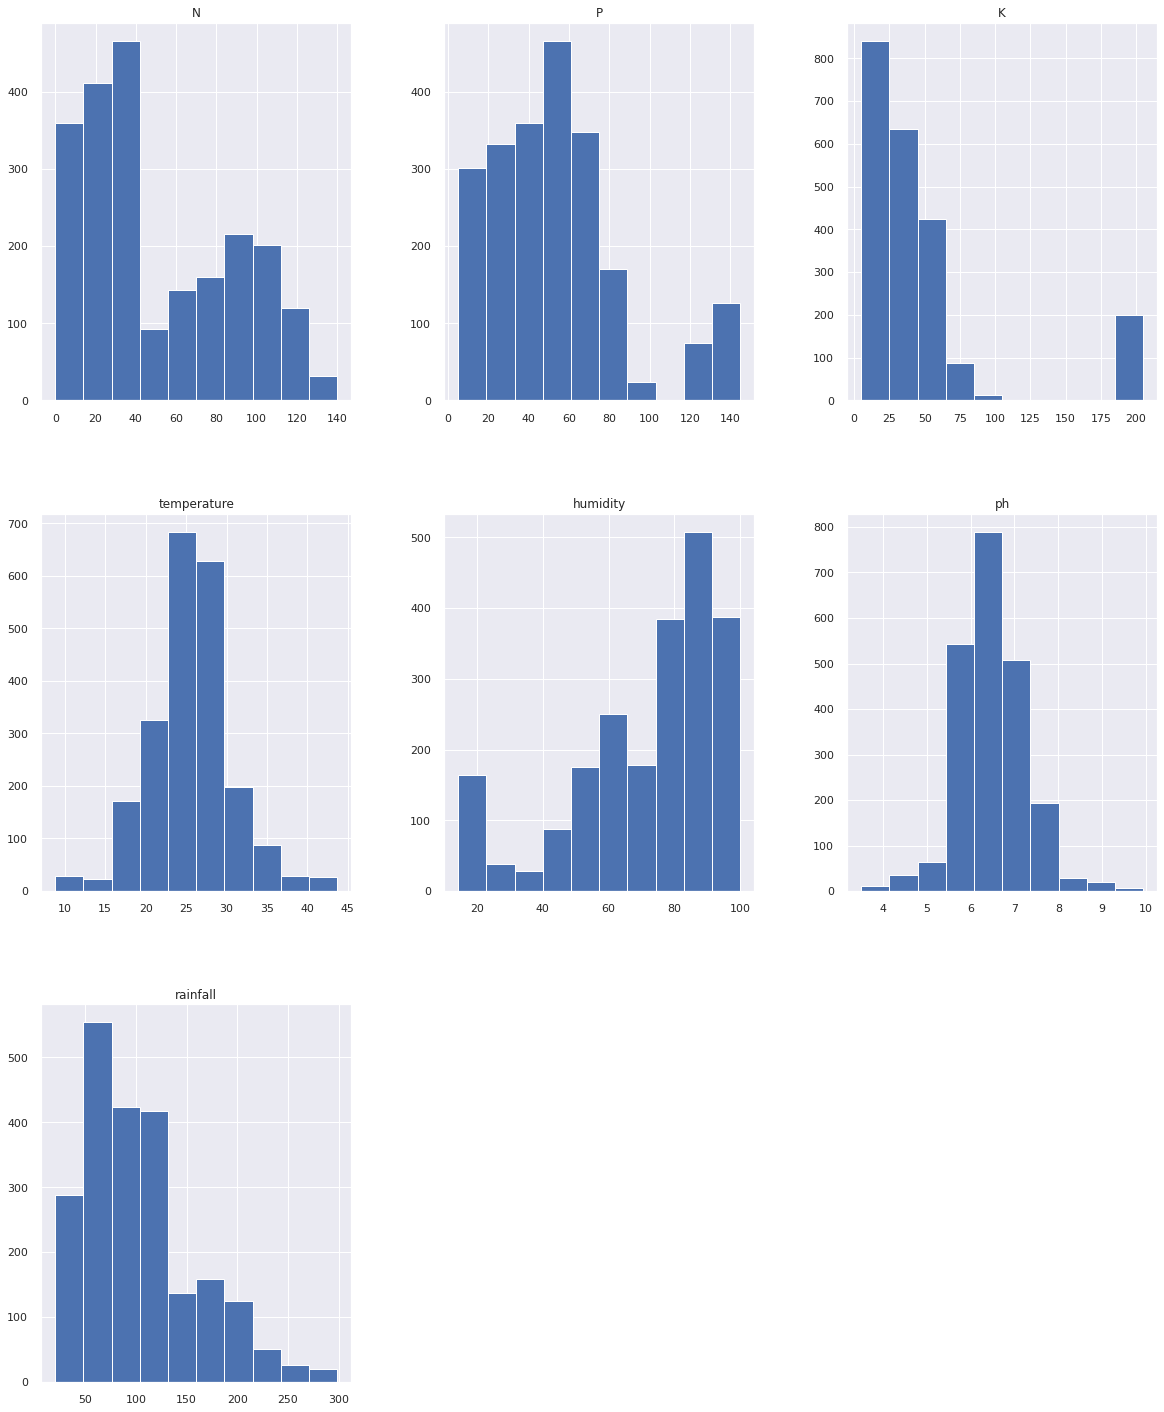

In [ ]:
df.hist(figsize=(20,25))

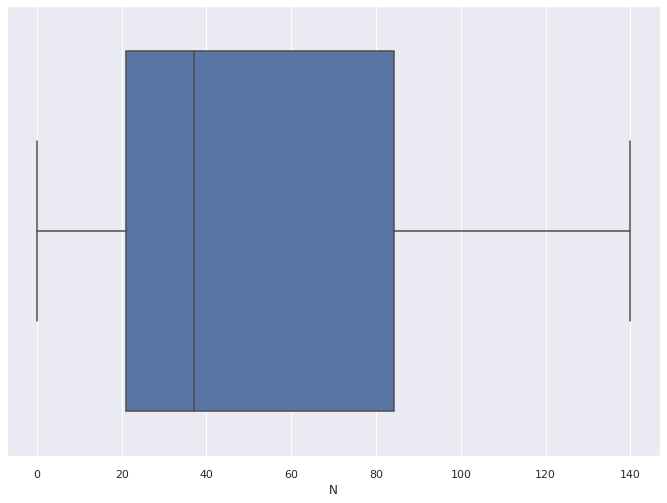

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x="N")

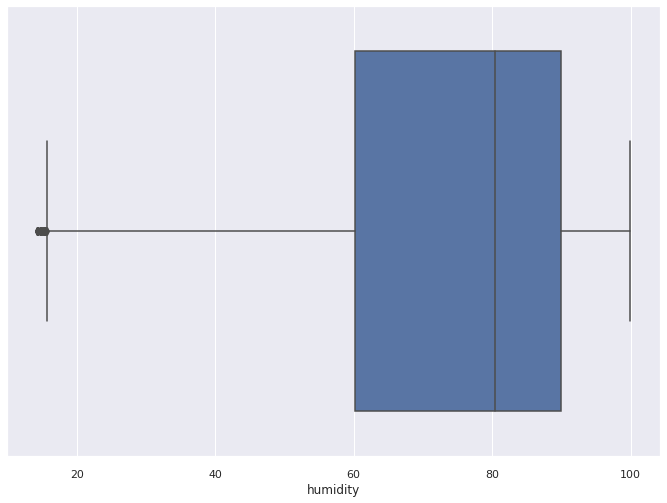

In [ ]:
sns.boxplot(data=df, x="humidity")

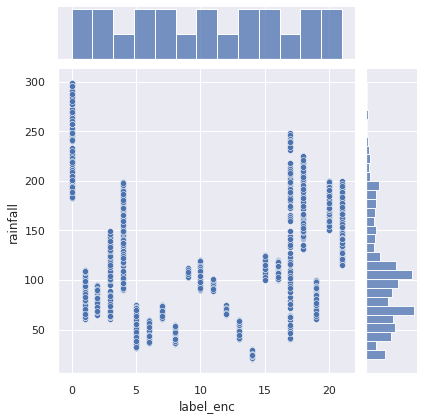

In [ ]:
sns.jointplot(data.label_enc, df.rainfall)

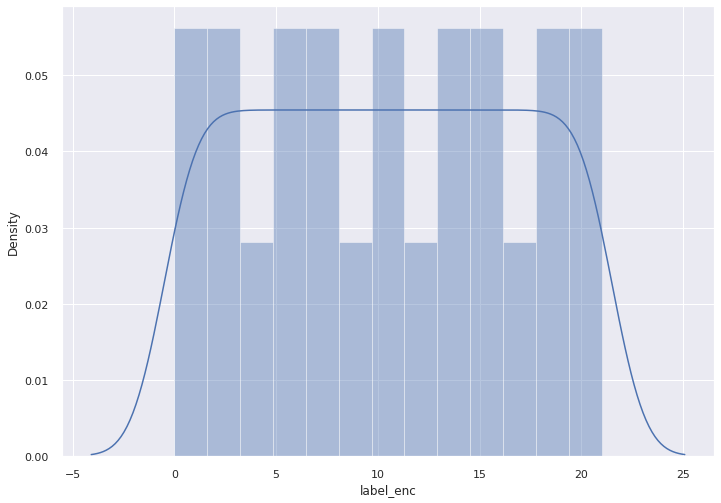

In [ ]:
sns.distplot(data.label_enc)

In [ ]:
df['temperature'].max()

43.67549305

In [ ]:
df['temperature'].min()

8.825674745

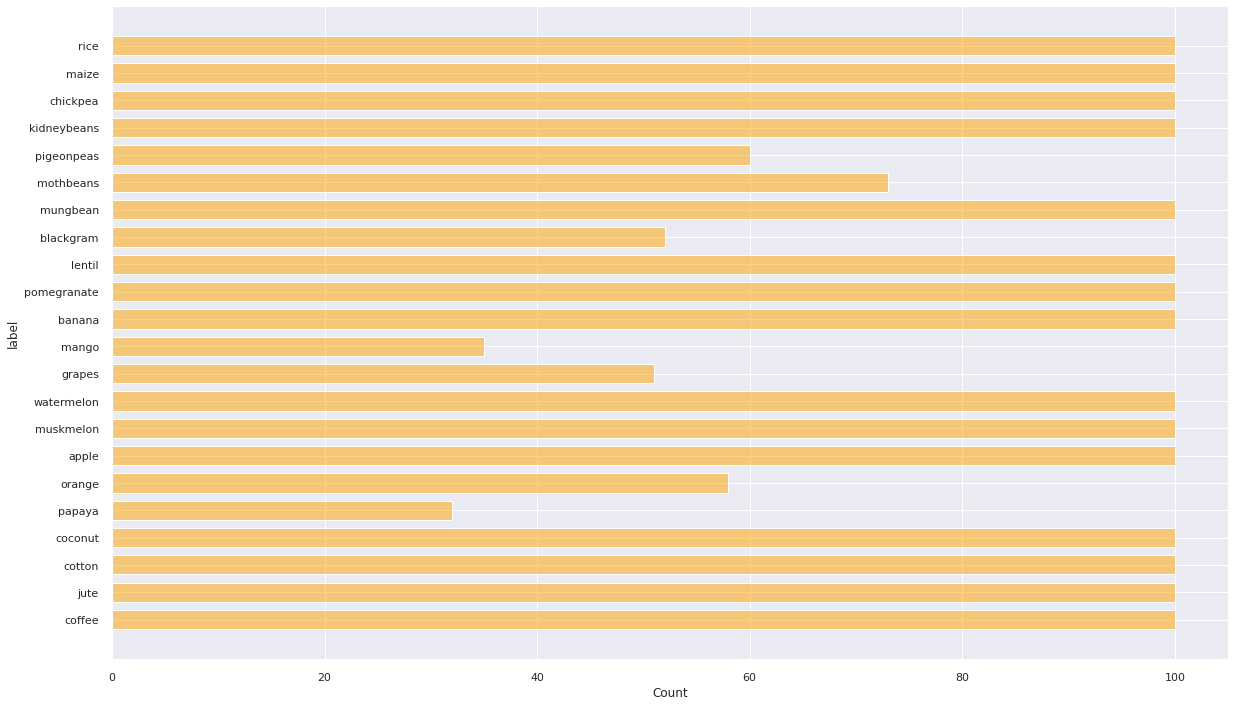

In [ ]:
plt.figure(figsize=(20,12))
Crop_Median_Temperatures =df.query("temperature > 15  & temperature <= 30 ") 
sns.histplot(y=Crop_Median_Temperatures.label, shrink=.7 ,color="orange" , alpha=0.5 )

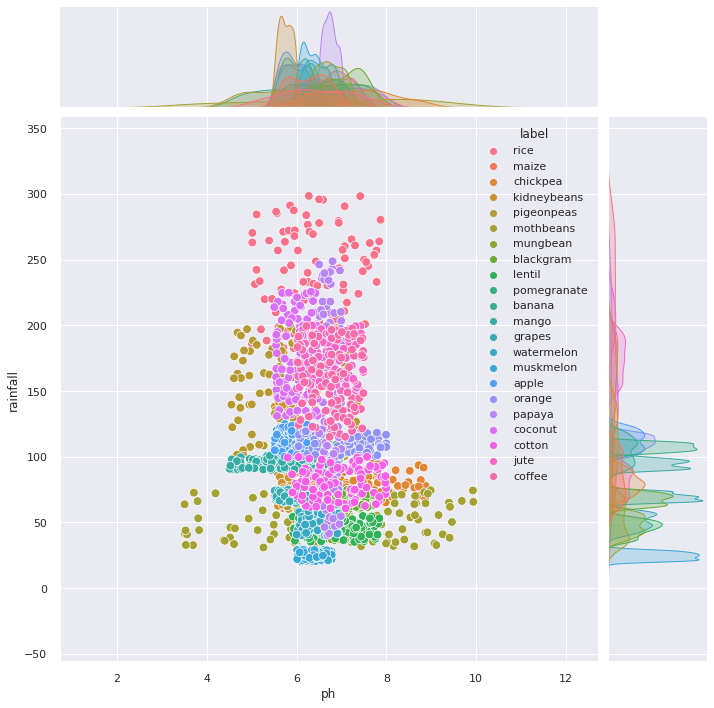

In [ ]:
sns.jointplot(data=df, x="ph", y="rainfall" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

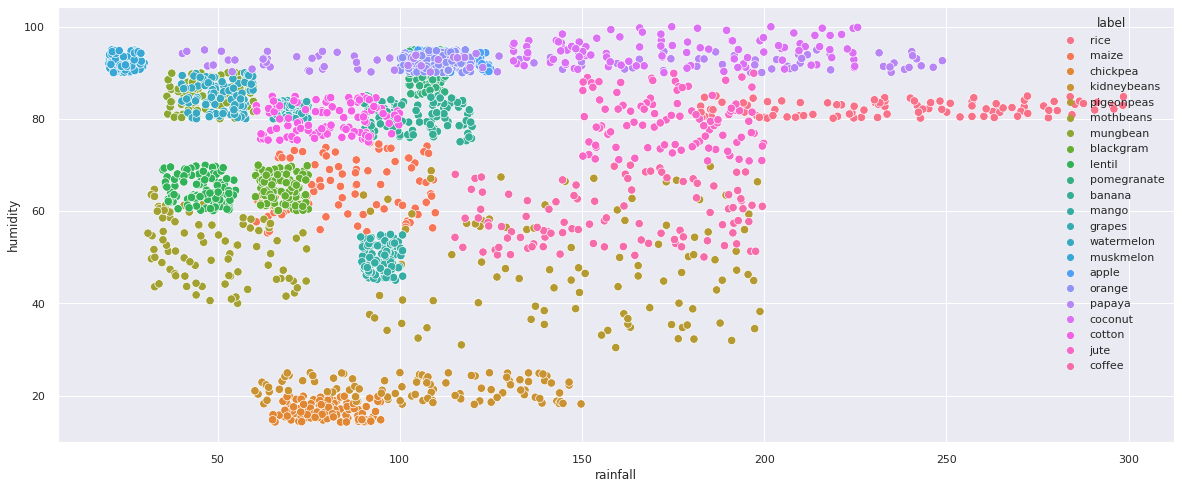

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x="rainfall", y="humidity" , hue="label" ,s=70)
plt.show()

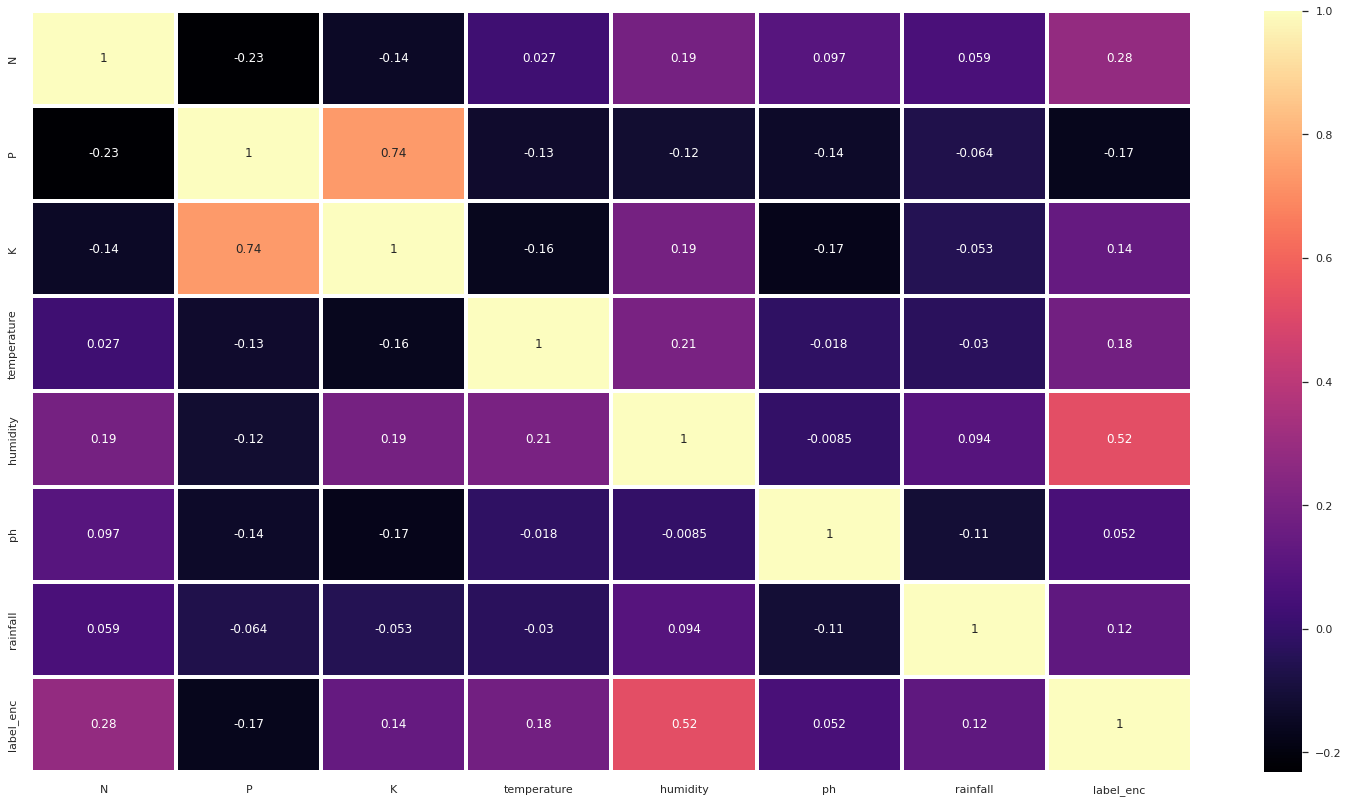

In [ ]:
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(26,14)})
sns.heatmap(data.corr(),cmap = 'magma',linecolor = 'white', linewidth = 3, annot = True)

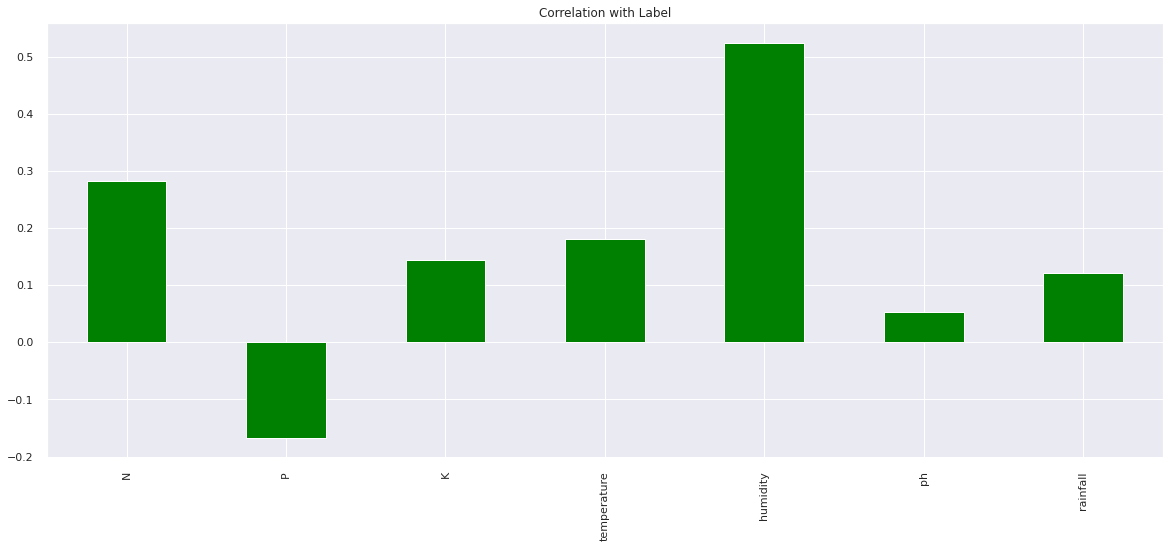

In [ ]:
data.drop('label_enc', axis=1).corrwith(data.label_enc).plot(kind='bar', grid=True, figsize=(20, 8),title="Correlation with Label",color="Green");

#PCA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
df_dup = df
df_dup.iloc[:,1:].describe()

,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop('label', axis = 1)
Y = df['label']

X = scaler.fit_transform(X)
dataX = df.drop('label', axis = 1)
dfx = pd.DataFrame(data=X, columns=dataX.columns[0:])

In [ ]:
dfx.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373


In [ ]:
dfx.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

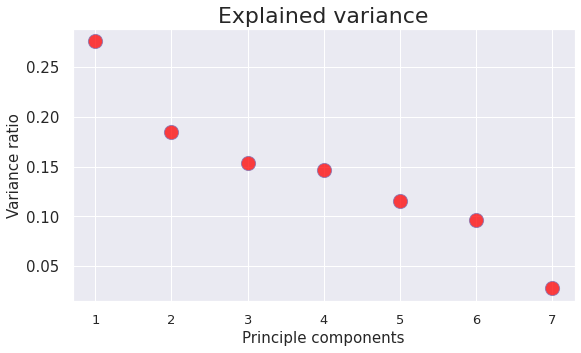

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='red', edgecolor='m')
plt.grid(True)
plt.title('Explained variance', fontsize = 22)
plt.xlabel('Principle components',fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))], fontsize = 13)
plt.yticks(fontsize=15)
plt.ylabel('Variance ratio', fontsize = 15)
plt.show()

In [ ]:
percentage = 0.0
count = 0
for i in range(len(dfx_pca.explained_variance_ratio_)):
  percentage += dfx_pca.explained_variance_ratio_[i]
  count += 1
  if percentage>0.7:
    break
print(percentage)
print(count)

0.7606469712075244
4


In [ ]:
pca = PCA(n_components=4)
dfxx_pca = pca.fit(dfx)

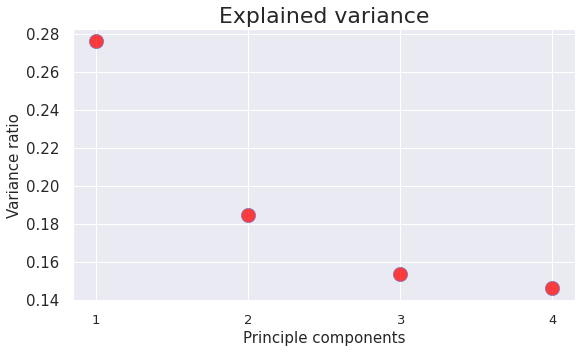

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(x=[i+1 for i in range(len(dfxx_pca.explained_variance_ratio_))],
            y=dfxx_pca.explained_variance_ratio_,
            s=200, alpha=0.75, c='red', edgecolor='m')
plt.grid(True)
plt.title('Explained variance', fontsize = 22)
plt.xlabel('Principle components',fontsize=15)
plt.xticks([i+1 for i in range(len(dfxx_pca.explained_variance_ratio_))], fontsize = 13)
plt.yticks(fontsize=15)
plt.ylabel('Variance ratio', fontsize = 15)
plt.show()

In [ ]:
pcaDF = pca.transform(dfx)
pcaDF = pd.DataFrame(data=pcaDF)
pcaDF.head()

,0,1,2,3
0,-0.582869,-0.844586,1.373343,-1.614129
1,-0.474635,-0.784895,1.252178,-1.792762
2,-0.634068,-0.694522,1.179332,-1.818106
3,-1.047920,-1.087658,1.393351,-0.982401
4,-0.873258,-0.658673,1.455685,-2.335012


#Model training testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(pcaDF, Y, test_size=0.33, random_state=42)
accuracy_dict = {}

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
aboostClf = AdaBoostClassifier(n_estimators=6, random_state=5)
aboostClf.fit(X_train, y_train)
y_pred_test = aboostClf.predict(X_test)
accuracy_dict['adaBoost'] = accuracy_score(y_test, y_pred_test)
print('Adaboost Accuracy : ',accuracy_dict['adaBoost'])

Adaboost Accuracy :  0.12396694214876033


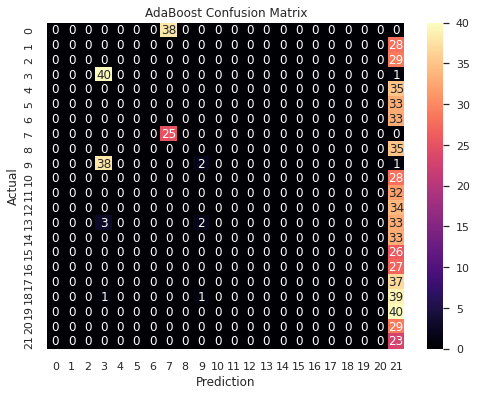

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
# print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
SVMclf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=5, tol=1e-5))
SVMclf.fit(X_train, y_train)
y_pred_test = SVMclf.predict(X_test)
accuracy_dict['SVM'] = accuracy_score(y_test, y_pred_test)
print('SVM Accuracy : ',accuracy_dict['SVM'])

SVM Accuracy :  0.7341597796143251


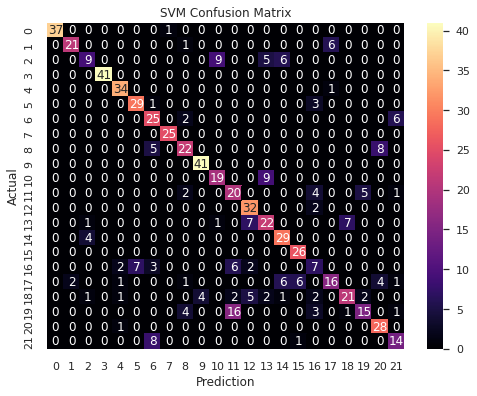

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
# print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("SVM Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model=  GaussianNB()
nbClf = model.fit(X_train,y_train)
y_pred_test = nbClf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_test)
accuracy_dict['GNB'] = accuracy_score(y_test, y_pred_test)
print('GNB Accuracy : ',accuracy_dict['GNB'])

GNB Accuracy :  0.7988980716253443


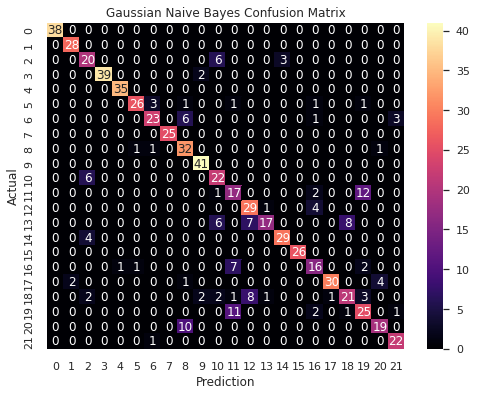

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgstClf = LogisticRegression(random_state=3)
lgstClf.fit(X_train, y_train)
y_pred_test = lgstClf.predict(X_test)
accuracy_dict['logisticRegression'] = accuracy_score(y_test,y_pred_test)
print('logisticRegression Accuracy : ',accuracy_dict['logisticRegression'])

logisticRegression Accuracy :  0.8099173553719008


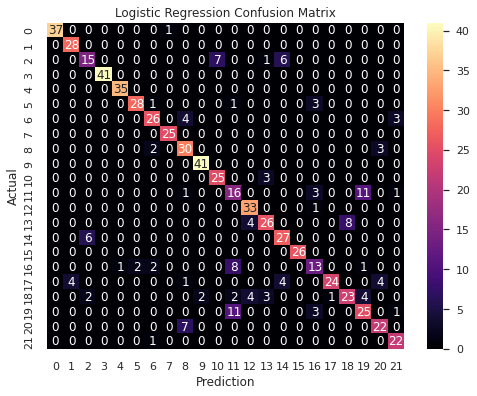

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
# print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClf = RandomForestClassifier(n_estimators = 6)
rfClf.fit(X_train,y_train)
y_pred_test = rfClf.predict(X_test)
accuracy_dict['randomForest'] = accuracy_score(y_test, y_pred_test)
print('randomForest Accuracy : ',accuracy_dict['randomForest'])

randomForest Accuracy :  0.8250688705234159


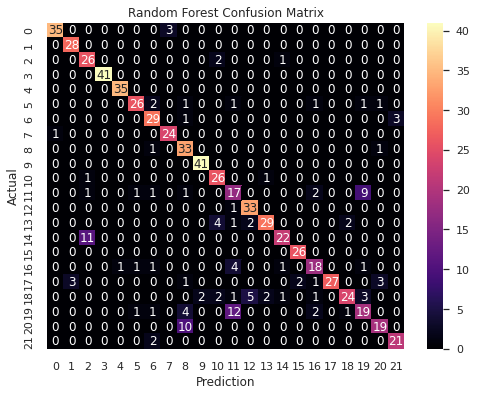

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
# print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_test = neigh.predict(X_test)
accuracy_dict['KNN'] = accuracy_score(y_test, y_pred_test)
print('KNN Accuracy : ',accuracy_dict['KNN'])

KNN Accuracy :  0.8526170798898072


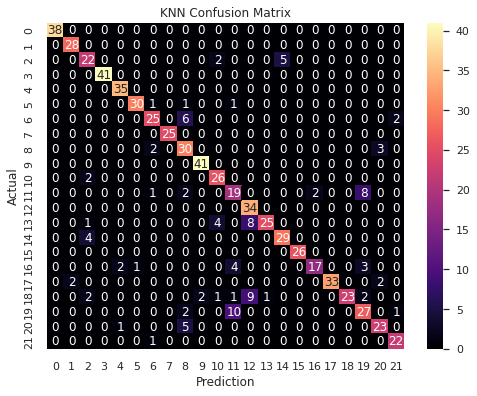

In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
# print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'magma')
plt.title("KNN Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Accuracy Comparison

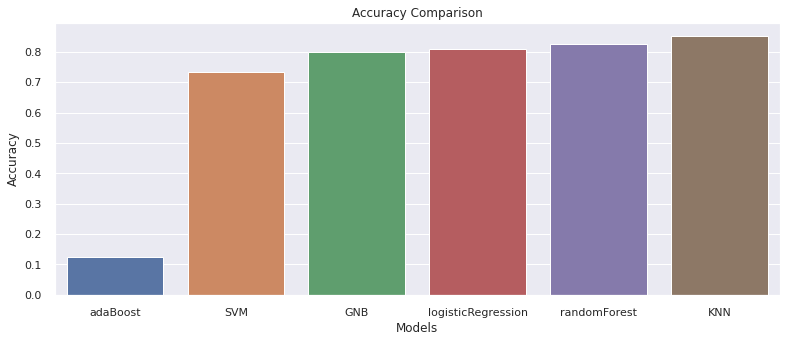

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[13,5])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# print(list(accuracy_dict.keys()))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))

# Without PCA

## Train And Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis = 1), df['label'], test_size=0.33, random_state=42)
accuracy_dict_without_pca = {}

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
aboostClf = AdaBoostClassifier(n_estimators=6, random_state=5)
aboostClf.fit(X_train, y_train)
y_pred_test = aboostClf.predict(X_test)
accuracy_dict_without_pca['adaBoost'] = accuracy_score(y_test, y_pred_test)
print('Adaboost Accuracy : ',accuracy_dict_without_pca['adaBoost'])

Adaboost Accuracy :  0.10192837465564739


## SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
SVMclf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=5, tol=1e-5))
SVMclf.fit(X_train, y_train)
y_pred_test = SVMclf.predict(X_test)
accuracy_dict_without_pca['SVM'] = accuracy_score(y_test, y_pred_test)
print('SVM Accuracy : ',accuracy_dict_without_pca['SVM'])

SVM Accuracy :  0.9573002754820936


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nbClf = GaussianNB().fit(X_train,y_train)
y_pred_test = nbClf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_test)
accuracy_dict_without_pca['GNB'] = accuracy_score(y_test, y_pred_test)
print('GNB Accuracy : ',accuracy_dict_without_pca['GNB'])

GNB Accuracy :  0.9944903581267218


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgstClf = LogisticRegression(random_state=3)
lgstClf.fit(X_train, y_train)
y_pred_test = lgstClf.predict(X_test)
accuracy_dict_without_pca['logisticRegression'] = accuracy_score(y_test,y_pred_test)
print('logisticRegression Accuracy : ',accuracy_dict_without_pca['logisticRegression'])

logisticRegression Accuracy :  0.9504132231404959


## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfClf = RandomForestClassifier(n_estimators = 6)
rfClf.fit(X_train,y_train)
y_pred_test = rfClf.predict(X_test)
accuracy_dict_without_pca['randomForest'] = accuracy_score(y_test, y_pred_test)
print('randomForest Accuracy : ',accuracy_dict_without_pca['randomForest'])

randomForest Accuracy :  0.9848484848484849


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred_test = neigh.predict(X_test)
accuracy_dict_without_pca['KNN'] = accuracy_score(y_test, y_pred_test)
print('KNN Accuracy : ',accuracy_dict_without_pca['KNN'])

KNN Accuracy :  0.9710743801652892


## Accuracy Comparison

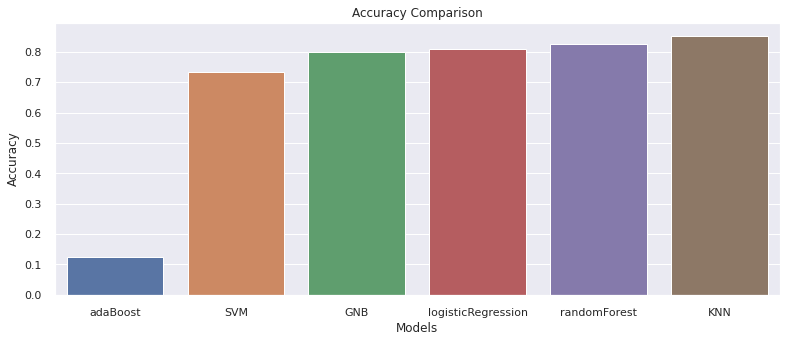

In [ ]:
plt.figure(figsize=[13,5])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# print(list(accuracy_dict.keys()))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))

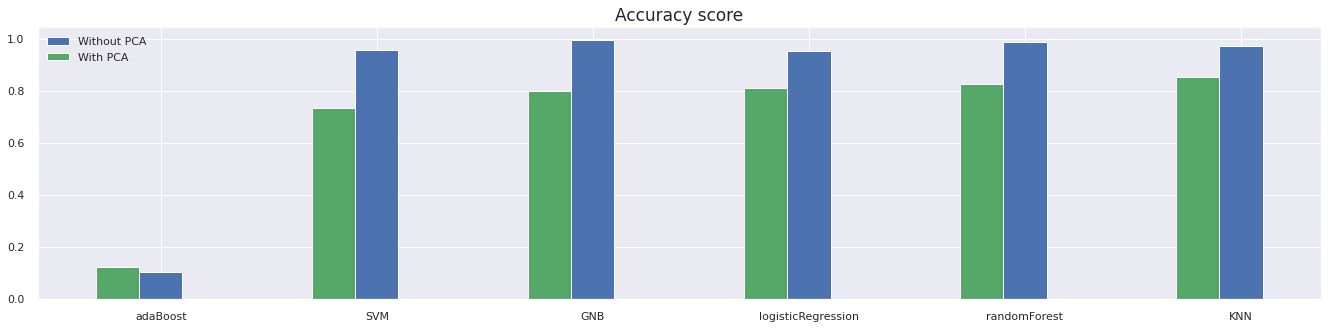

In [ ]:
plt.figure(figsize=[23,5])
#sample data
accuracy_pre = accuracy_dict_without_pca
accuracy_post = accuracy_dict

X = np.arange(len(accuracy_pre))
ax = plt.subplot(111)
ax.bar(X, accuracy_pre.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, accuracy_post.values(), width=0.2, color='g', align='center')
ax.legend(('Without PCA','With PCA'))
plt.xticks(X, accuracy_pre.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()